# Project Title 
# Smart Manufacturing of Copper Products: Integrating IoT and Industrial Modeling

**Introduction**

The "IndustrialCopperModeling" project aims to address challenges faced by the copper industry in dealing with less complex data related to sales and pricing. The data may suffer from skewness and noise, affecting the accuracy of manual predictions. To overcome these challenges, the project proposes the implementation of machine learning regression and classification models using advanced techniques like data normalization, feature scaling, and outlier detection.

**Description**

The project focuses on two main aspects

-  **Regression Modeling** Predicting the continuous variable 'Selling_Price' using machine learning techniques, including data preprocessing, exploration of skewness and outliers, and model building.

-  **Classification Modeling** Developing a lead classification model based on the 'STATUS' variable, classifying leads as 'WON' or 'LOST.' This involves handling imbalance, exploring and treating skewness, and creating a classification model.

The solution includes Exploratory Data Analysis (EDA), data preprocessing, feature engineering, model building, and a Streamlit-based GUI for interactive predictions.

**Objectives**
- Develop proficiency in Python programming and data analysis libraries.
- Gain experience in data preprocessing techniques such as handling missing values, outlier detection, and normalization.
- Understand and visualize data through EDA techniques like boxplots, histograms, and scatter plots.
- Learn and apply advanced machine learning techniques for regression and classification.
- Build and optimize machine learning models using appropriate evaluation metrics and techniques.
- Acquire experience in feature engineering techniques to create informative data representations.
- Develop a web application using Streamlit to showcase and make predictions using the models.
- Understand challenges and best practices in the manufacturing domain and apply machine learning solutions.

**Project Motive**

The project aims to equip individuals with practical skills in data analysis, machine learning modeling, and creating interactive web applications. It provides a foundation to solve real-world problems in the manufacturing domain, addressing challenges related to data quality, model accuracy, and decision-making.

**Data Understanding**/Variables Explanation

- **id** Unique identifier for each transaction or item.

- **item_date Date** of recording or occurrence of each transaction or item.
  
- **quantity tons** Quantity of the item in tons for inventory management.

- **customer** Customer identifier for tracking sales and relationships.

- **country** Country associated with each customer for geographic insights.

- **status** Current status of the transaction or item.

- **item type** Categorization of the items being sold or produced.

- **application** Specific use or application of the items for tailored efforts.

- **thickness, width, material_ref, product_ref** Details about the items.

- **delivery date** Expected or actual delivery date for each item.

- **selling_price** Price at which the items are sold.


# Importing libirary

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime 
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Read Data

In [2]:
df=pd.read_csv("D:\DS NOTE\My external project\IndustrialCopperModeling\Copper_Set.xlsx - Result 1.csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,4.235592368,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00


# Data Preprocessing 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# Problem Statement

> During the process of converting the data types in correct oder data types
## Problem Details

### 1. Incorrect Data Type for 'quantity_tons' Column
- **Current State**: The 'quantity_tons' column is currently of data type 'object,' but it is expected to be in the 'float' format.
- **Desired State**: Convert the 'quantity_tons' column to the correct data type, which is 'float.'

### 2. 'item_date' Column Needs to Be Split
- **Current State**: The 'item_date' column is of data type 'float64,' but it needs to be separated into three distinct columns representing day, month, and year.
- **Desired State**: Create three new columns: 'item_day,' 'item_month,' and 'item_year' to store the respective values from the 'item_date' column.

### 3. 'delivery_date' Column Needs to Be Split
- **Current State**: Similar to 'item_date,' the 'delivery_date' column is of data type 'float64,' and it needs to be split into day, month, and year.
- **Desired State**: Create three new columns: 'delivery_day,' 'delivery_month,' and 'delivery_year' to store the corresponding values from the 'delivery_date' column.

### 4. Unnecessary Column 'id'
- **Current State**: The 'id' column is of data type 'object,' but it is not required for the prediction task.
- **Desired State**: Drop the 'id' column from the dataset, as it is not essential for the analysis or machine learning prediction.


In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


# Exploratory data analysis

# Convert argument to a numeric type
- This way, you can handle both negative values and non-numeric values in the 'quantity tons' column. After this conversion, you can further handle NaN values based on your specific requirements.

# Problem Statement-  **During the process of converting the 'quantity tons' column to numeric values, a ValueError was encountered due to a non-numeric value ("e") at position 173086.**

In [5]:
# To find error spot row 
selected_row = df['quantity tons'].loc[[173085,173086,173087,173088,173089]]
selected_row

173085    102.8818748
173086              e
173087    17.14139804
173088    2.045748858
173089    29.03904775
Name: quantity tons, dtype: object

**Check the entire DataFrame occurrences of 'e'**

In [6]:
# Find all occurrences of 'e' in the entire DataFrame
e_mask = df.eq('e').any(axis=1)
# Filter the DataFrame to get rows with 'e'
e_rows = df[e_mask]
for index, row in e_rows.iterrows():
    print(row)


id               3C0A018F-4A85-4D96-A1AA-72BF0F7DC6DD
item_date                                  20200714.0
quantity tons                                       e
customer                                   30157111.0
country                                          78.0
status                                            Won
item type                                           W
application                                      41.0
thickness                                         0.5
width                                          1000.0
material_ref                                      NaN
product_ref                                 164141591
delivery date                              20200801.0
selling_price                                   672.0
Name: 173086, dtype: object


- In this example, df[e_mask] filters the DataFrame to retain only the rows where at least one element is equal to 'e'. The iterrows() method is then used to iterate through the rows of this filtered DataFrame. For each iteration, the row is printed

In [7]:
# Values of the DataFrame are replaced with other values dynamically
df['quantity tons']=df['quantity tons'].replace('e',0)


In [8]:
# To find error spot row 
selected_row = df['quantity tons'].loc[[173085,173086,173087,173088,173089]]
selected_row

173085    102.8818748
173086              0
173087    17.14139804
173088    2.045748858
173089    29.03904775
Name: quantity tons, dtype: object

In [9]:
# Convert argument to a numeric type
df['quantity tons'] = pd.to_numeric(df['quantity tons']).astype('float64')
df['quantity tons']

0          54.151139
1         768.024839
2         386.127949
3         202.411065
4         785.526262
             ...    
181668    102.482422
181669    208.086469
181670      4.235594
181671      4.235592
181672    406.686538
Name: quantity tons, Length: 181673, dtype: float64

# Replace values starting with '00000' with NaN
- Some rubbish values are present in ‘Material_Reference’which starts with ‘00000’ value which should be converted into null. Treat
reference columns as categorical variables. 

In [10]:
# Replace values starting with '00000' with NaN
df['material_ref'] = np.where(df['material_ref'].str.startswith('00000'), np.nan, df['material_ref'])
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,4.235592,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00


**This code cleans up a DataFrame column called 'material_ref.' If any value in that column starts with '00000,' it's replaced with NaN, which means there's no valid data. This helps ensure the data is tidy and ready for analysis, as it deals with potential issues or missing information in that specific column.**

# Denoting duplicate
- There is no duplicate in ths dataframe

In [11]:
df.duplicated().sum()

0

# Detect missing values

In [12]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77955
product_ref          0
delivery date        1
selling_price        1
dtype: int64


# Encoding and Handling Null Values in the Dataset

Encoding Categorical Data

> Before addressing null values, categorical data encoding is recommended to ensure that machine learning algorithms can process the information effectively. The process involves converting categorical variables into numerical representations. For this dataset, consider the following encoding methods:

In [13]:
df[['material_ref','status','item type']].value_counts()

material_ref                   status  item type
DC01 RED.FLAT KUCHNIA EKO 2.2  Won     W            776
DX51D+Z                        Won     W            743
G9010                          Won     W            591
G9006                          Won     W            483
G9002                          Won     W            434
                                                   ... 
G8717                          Lost    S              1
1220/0.75/S320/Z140            Lost    S              1
80500079                       Won     WI             1
G9001                          Draft   W              1
CVX3001250T                    Won     W              1
Name: count, Length: 24879, dtype: int64

Ordinal encoding seems suitable for 'material_ref,' 'status,' 'item type,' and 'application' given their apparent order or priority. Ensure the assigned numerical labels align with the logical progression of categories. For 'status,' if the order is not clear, consider one-hot encoding to maintain independence among categories. Adjustments can be made based on your specific domain knowledge and the context of the data.

# Visulization 

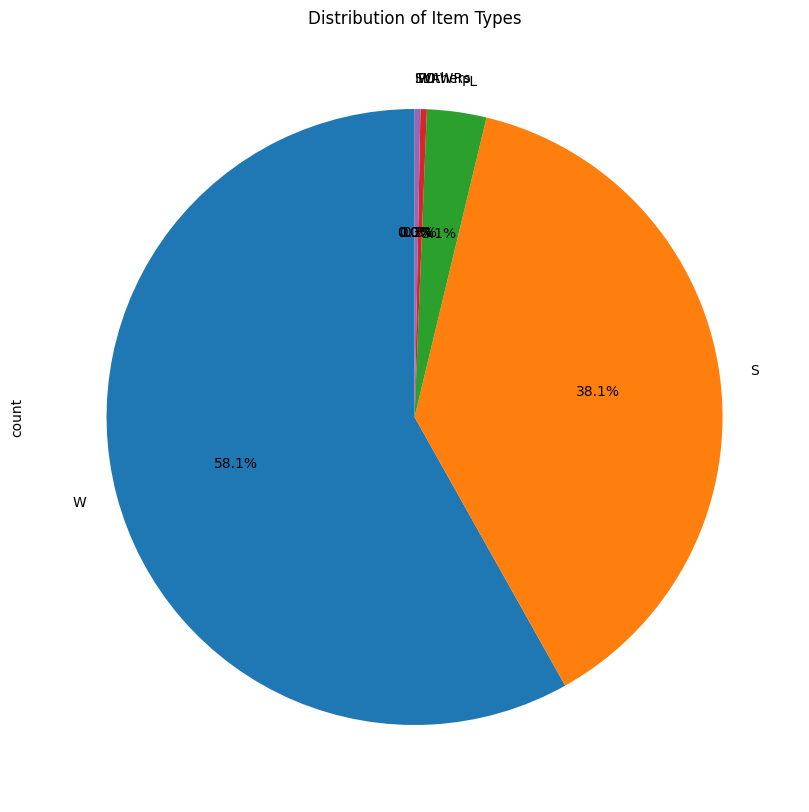

In [14]:
# Pie chart - Distribution of Item Types
plt.figure(figsize=(10, 10))
df['item type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Item Types')
plt.show()

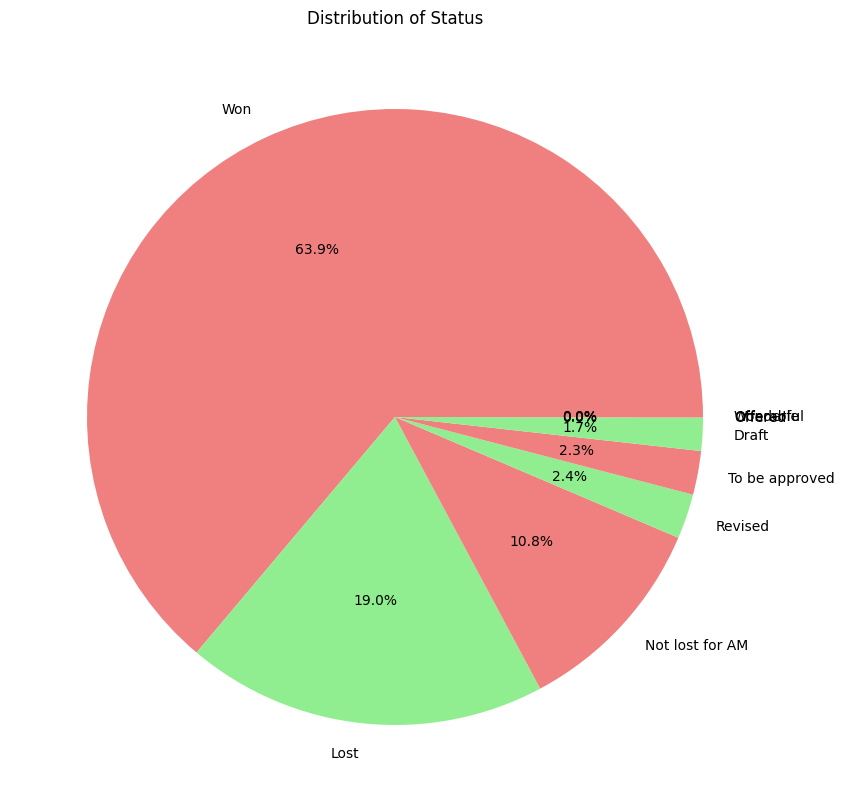

In [15]:
# Pie chart for 'status' distribution
status_counts = df['status'].value_counts()
plt.figure(figsize=(25, 10))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Status')
plt.show()

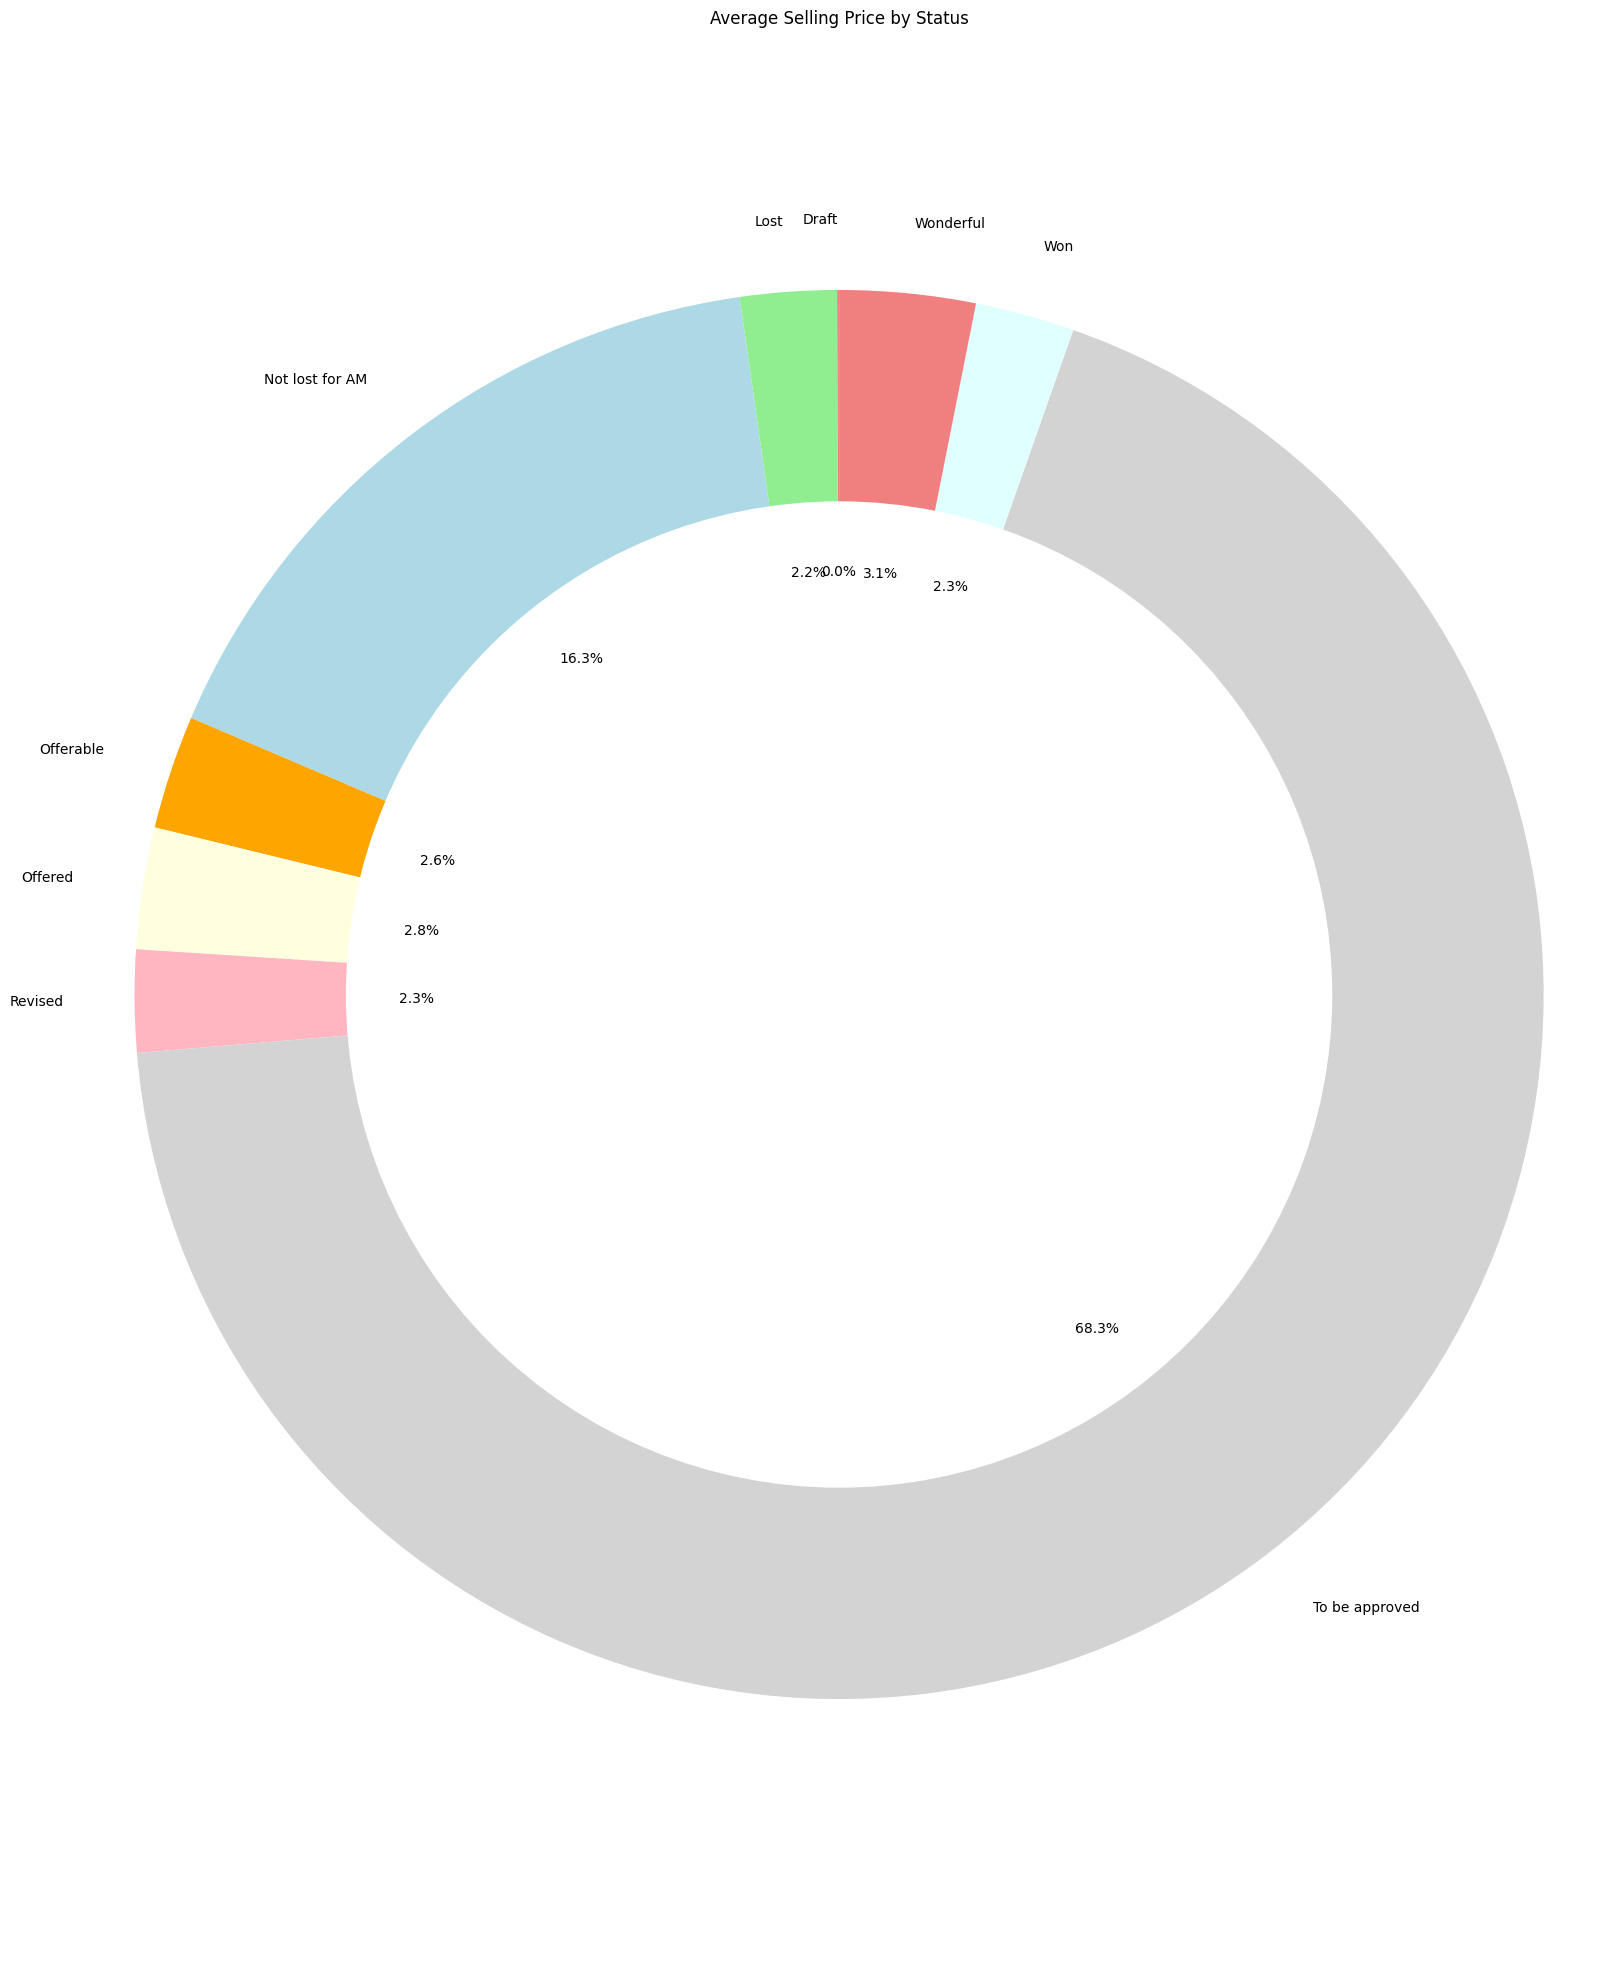

In [16]:
# Group data by 'Status' and calculate average selling price for each category
avg_selling_price_by_status = df.groupby('status')['selling_price'].mean().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(20,25))

# Plot 'Average Selling Price' by 'Status' as a pie chart
wedges, texts, autotexts = ax.pie(avg_selling_price_by_status['selling_price'], labels=avg_selling_price_by_status['status'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightblue', 'orange', 'lightyellow', 'lightpink', 'lightgray', 'lightcyan'])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Set the title
ax.set_title('Average Selling Price by Status')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the plot
plt.show()


In [17]:
df['status'].value_counts()

status
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

# Feature Encoding 

In [18]:
# Assuming 'F_Encoding_columns' is a DataFrame, select only the specified columns
F_Encoding_columns=df[['material_ref', 'status', 'item type']].copy()

In [19]:
ord_ede=OrdinalEncoder()
ord_encoded=ord_ede.fit(F_Encoding_columns)
ord_encoded

OrdinalEncoder()

In [20]:
ord_encoded=ord_ede.transform(F_Encoding_columns)
ord_encoded_df=pd.DataFrame(ord_encoded,columns=F_Encoding_columns.columns)
ord_encoded_df

,material_ref,status,item type
0,10285.0,7.0,5.0
1,1988.0,7.0,5.0
2,14589.0,7.0,6.0
3,10559.0,7.0,3.0
4,4597.0,7.0,5.0
...,...,...,...
181668,1040.0,7.0,5.0
181669,872.0,7.0,5.0
181670,1265.0,7.0,5.0
181671,1075.0,7.0,5.0


In [21]:
# Drop specified columns from the original DataFrame 'df' and assign the result back to 'df'
df = df.drop(['material_ref','status','item type'], axis=1).copy()

In [22]:
df1=pd.concat([df,ord_encoded_df],axis=1)

In [23]:
df1

,id,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,material_ref,status,item type
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,10285.0,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,1988.0,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,28.0,0.38,952.0,628377,20210101.0,644.33,14589.0,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,10559.0,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,10.0,4.00,2000.0,640665,20210301.0,577.00,4597.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,1040.0,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,872.0,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,1265.0,7.0,5.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,4.235592,30200854.0,25.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,1075.0,7.0,5.0


# Replacing missing values 

In [24]:
df1.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
application         24
thickness            1
width                0
product_ref          0
delivery date        1
selling_price        1
material_ref     77955
status               2
item type            0
dtype: int64

**Since the 'material_ref' column has a significant number of null values, we intend to replace these nulls. For the remaining columns with only a small number of null values, we can safely remove those instances without affecting the overall integrity of the dataset.**

In [25]:
df1['material_ref'] = df1['material_ref'].fillna(df1['material_ref'].median())
df1=df1.dropna()

- Filling missing values with the median is chosen for its robustness to outliers, making it suitable for numeric data like quantity, width, and deliveryYear. This approach preserves the original distribution, crucial for skewed data, avoiding bias introduced by using the mean. Its simplicity, implemented through pandas' fillna() method, is advantageous, especially for quick data preprocessing. Additionally, the method offers flexibility, allowing targeted imputation in specific columns based on domain knowledge for variable-specific handling of missing values.

In [26]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
material_ref     0
status           0
item type        0
dtype: int64

# Convert argument to datetime

In [27]:
# Date convert into day month and year formating for easy model uderstanding 
df1['item_date']=pd.to_datetime(df1['item_date'])
df1['delivery date']=pd.to_datetime(df1['delivery date'])

In [28]:
# Extracting Day, Month, and Year
df1['Day'] = df1['item_date'].dt.day.astype('int64')
df1['deliveryDay'] = df1['delivery date'].dt.day.astype('int64')
df1['Month'] = df1['item_date'].dt.month.astype('int64')
df1['deliveryMonth'] = df1['delivery date'].dt.month.astype('int64')
df1['Year'] = df1['item_date'].dt.year.astype('int64')
df1['deliveryYear'] = df1['delivery date'].dt.year.astype('int64')
# Extracting Hour, Minute, and Second
df1['Hour'] = df1['item_date'].dt.hour.astype('int64')
df1['Hour'] = df1['delivery date'].dt.hour.astype('int64')
df1['Minute'] = df1['item_date'].dt.minute.astype('int64')
df1['Minute'] = df1['delivery date'].dt.minute.astype('int64')
df1['Second'] = df1['item_date'].dt.second.astype('int64')
df1['Second'] = df1['delivery date'].dt.second.astype('int64')

# Drop unwanted columns 

In [29]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country',
       'application', 'thickness', 'width', 'product_ref', 'delivery date',
       'selling_price', 'material_ref', 'status', 'item type', 'Day',
       'deliveryDay', 'Month', 'deliveryMonth', 'Year', 'deliveryYear', 'Hour',
       'Minute', 'Second'],
      dtype='object')

In [30]:
df1=df1.drop(['id','item_date','delivery date'],axis=1)

In [31]:
# Create a new feature: price per ton
df1['price_per_ton'] = df1['selling_price'] / df1['quantity tons']
# Create a new feature by multiplying 'quantity tons' and 'selling_price'
df1['total_revenue'] = df1['quantity tons'] * df1['selling_price']
# Create a new feature by dividing 'quantity tons' by 'width'
df1['quantity_width_ratio'] = df1['quantity tons'] / df1['width']

# Outlier Detection 

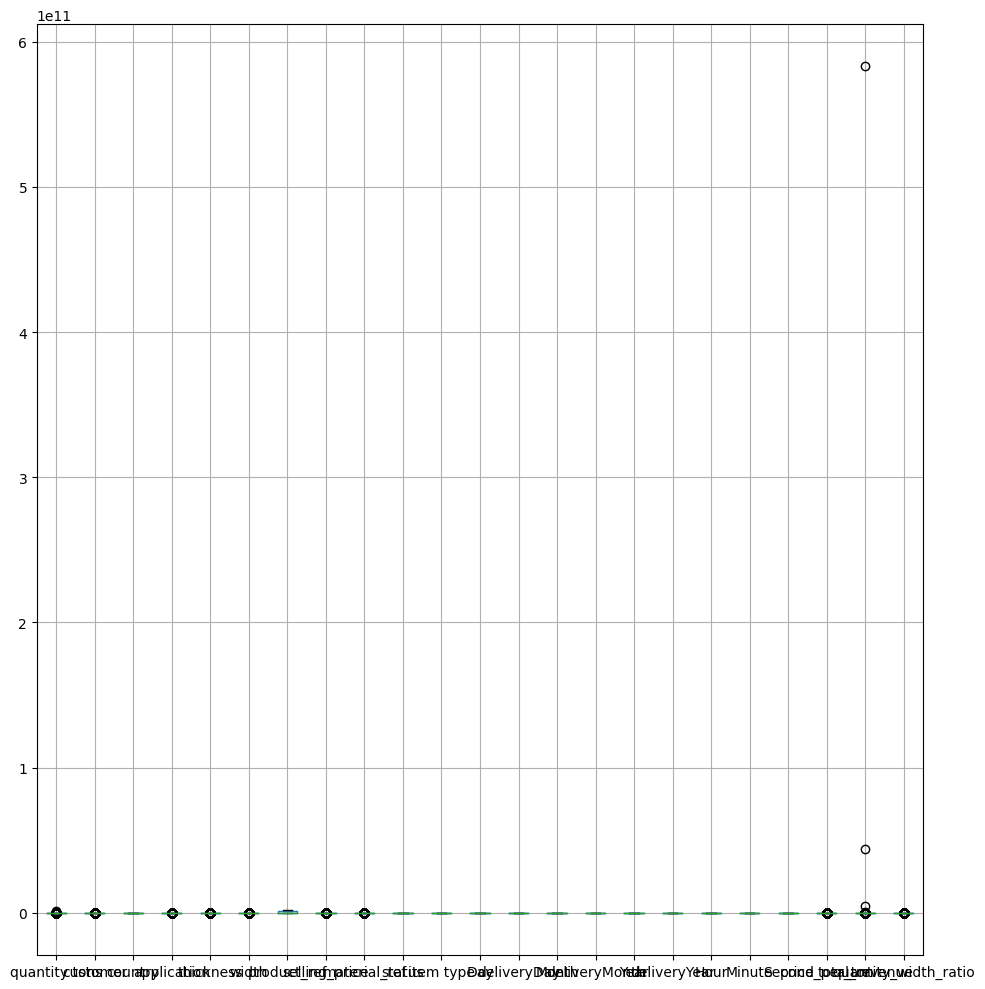

In [32]:
df1.boxplot(figsize=(10,10))
plt.tight_layout()
plt.show()

In [33]:
df1.columns

Index(['quantity tons', 'customer', 'country', 'application', 'thickness',
       'width', 'product_ref', 'selling_price', 'material_ref', 'status',
       'item type', 'Day', 'deliveryDay', 'Month', 'deliveryMonth', 'Year',
       'deliveryYear', 'Hour', 'Minute', 'Second', 'price_per_ton',
       'total_revenue', 'quantity_width_ratio'],
      dtype='object')

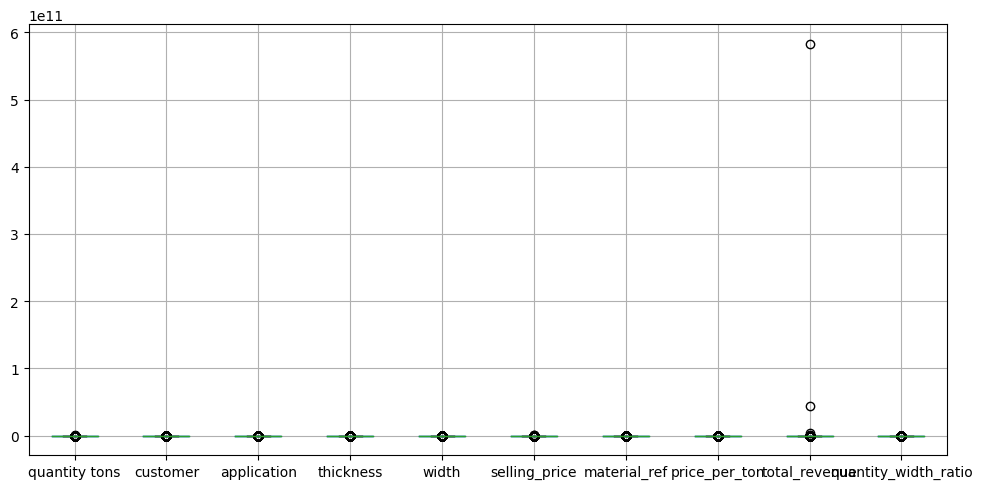

In [34]:
df1[['quantity tons', 'customer','application','thickness','width','selling_price','material_ref',
     'price_per_ton', 'total_revenue','quantity_width_ratio']].boxplot(figsize=(10,5))
plt.tight_layout()
plt.show()

In [35]:
df1[['quantity tons', 'customer','application','thickness',
     'width','selling_price','material_ref','price_per_ton', 
     'total_revenue','quantity_width_ratio']].describe()

,quantity tons,customer,application,thickness,width,selling_price,material_ref,price_per_ton,total_revenue,quantity_width_ratio
count,1.816360e+05,1.816360e+05,181636.000000,181636.000000,181636.000000,1.816360e+05,181636.000000,1.816360e+05,1.816360e+05,181636.000000
mean,5.876085e+03,3.023251e+07,25.616188,2.564160,1295.266159,1.918339e+03,9069.212711,inf,3.557350e+06,4.702733
std,2.349314e+06,1.005619e+05,17.754070,6.572553,261.641853,3.318285e+05,3528.772586,NaN,1.371921e+09,1879.470078
min,-4.000000e+00,1.245800e+04,2.000000,0.180000,1.000000,-1.160000e+03,0.000000,-1.807500e+02,-1.149087e+05,-0.002667
25%,1.096855e+01,3.019688e+07,10.000000,0.700000,1180.000000,6.690000e+02,8591.000000,1.075194e+01,9.020699e+03,0.009051
50%,3.036402e+01,3.020524e+07,15.000000,1.500000,1250.000000,8.120000e+02,9443.000000,2.517368e+01,2.438675e+04,0.023782
75%,6.716332e+01,3.028042e+07,41.000000,3.000000,1500.000000,9.530000e+02,10185.000000,6.818697e+01,5.629753e+04,0.054145
max,1.000000e+09,3.040818e+07,99.000000,2500.000000,2990.000000,1.000010e+08,16402.000000,inf,5.830000e+11,800000.000000


>In the provided dataset, there are outliers observed in columns like 'quantity tons,' 'customer,' 'thickness,' 'width,' 'selling_price,' and'material_ref.' Outliers are extreme values that significantly differ from the majority of the data, potentially impacting analysis and model performance.

# Analysis:

- **Identification: Outliers were identified by examining statistical summaries, including mean, standard deviation, minimum, maximum, and quartiles.
Column-Specific Insights: Each column with outliers was individually examined to understand the nature of the extreme values.**

**Handle the outlier[**Inter Quartile Range**]**

In [36]:
Outlier_list= {}

In [37]:
for column in ['quantity tons', 'customer','application','thickness','width','selling_price',
               'material_ref','price_per_ton', 'total_revenue','quantity_width_ratio']:
    q1=df1[column].quantile(0.25)
    q3=df1[column].quantile(0.75)
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range= q3 +(1.5 * IQR)
    # Cap the entire range of outliers
    df1[column] = df1[column].clip( lower=lower_range, upper=upper_range)


    Outlier_list[column]= {'q1':q1,'q3':q3,'IQR':IQR,'lower_range':lower_range, 'upper_range':upper_range}

- **Why Cap?** Capping is chosen for practical reasons. **Extreme values might represent valid data points but can unduly influence statistical measures**. By capping, we retain these values but prevent them from dominating the dataset.

In [38]:
for column, values in Outlier_list.items():
    print(f"Column: {column}\nq1:{values['q1']} \nq3:{values['q3']}\nIQR:{values['IQR']} \nlower_range:{values['lower_range']} \nupper_range:{values['upper_range']}\n-----------------------")

    

Column: quantity tons
q1:10.96854651 
q3:67.16332059749999
IQR:56.194774087499994 
lower_range:-73.32361462125 
upper_range:151.45548172875
-----------------------
Column: customer
q1:30196884.0 
q3:30280416.0
IQR:83532.0 
lower_range:30071586.0 
upper_range:30405714.0
-----------------------
Column: application
q1:10.0 
q3:41.0
IQR:31.0 
lower_range:-36.5 
upper_range:87.5
-----------------------
Column: thickness
q1:0.7 
q3:3.0
IQR:2.3 
lower_range:-2.75 
upper_range:6.449999999999999
-----------------------
Column: width
q1:1180.0 
q3:1500.0
IQR:320.0 
lower_range:700.0 
upper_range:1980.0
-----------------------
Column: selling_price
q1:669.0 
q3:953.0
IQR:284.0 
lower_range:243.0 
upper_range:1379.0
-----------------------
Column: material_ref
q1:8591.0 
q3:10185.0
IQR:1594.0 
lower_range:6200.0 
upper_range:12576.0
-----------------------
Column: price_per_ton
q1:10.751936385288047 
q3:68.18696519710863
IQR:57.43502881182059 
lower_range:-75.40060683244283 
upper_range:154.339508

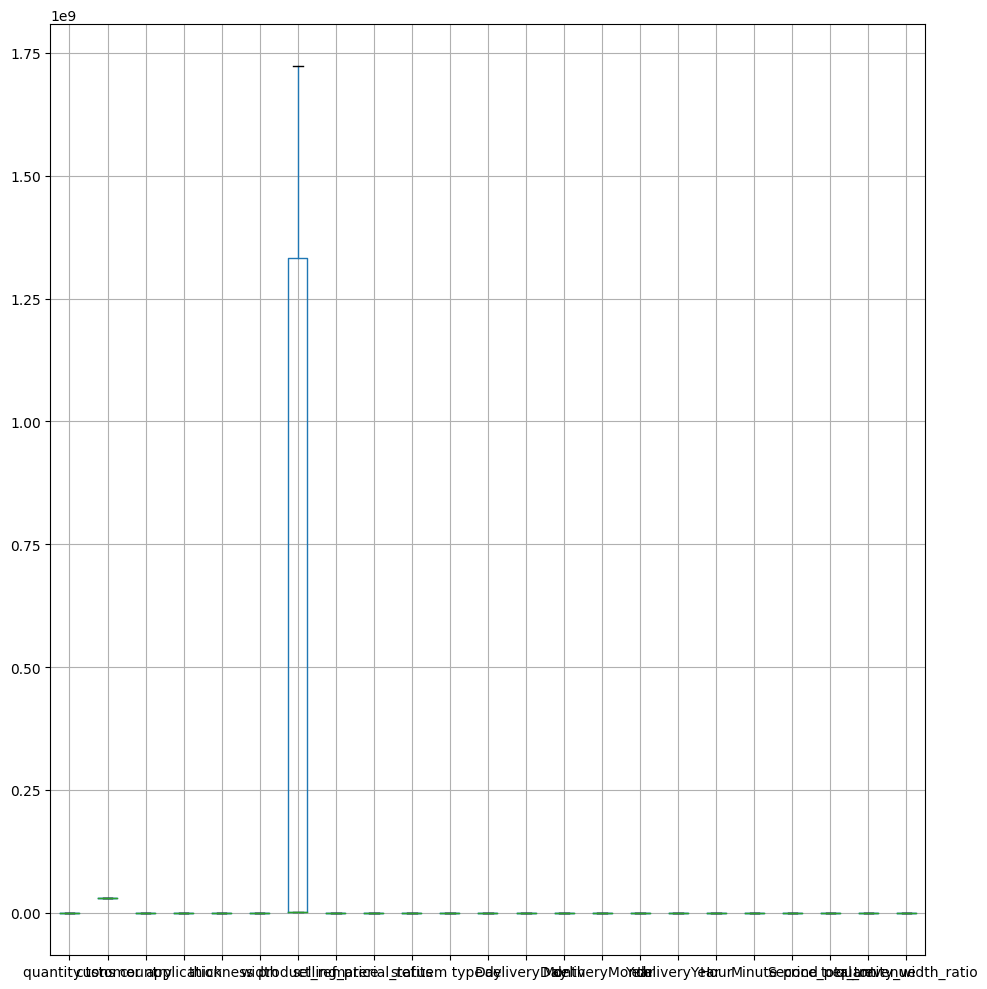

In [39]:
df1.boxplot(figsize=(10,10))
plt.tight_layout()
plt.show()

In [40]:
df1

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,material_ref,status,...,Month,deliveryMonth,Year,deliveryYear,Hour,Minute,Second,price_per_ton,total_revenue,quantity_width_ratio
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,854.00,10285.0,7.0,...,1,1,1970,1970,0,0,0,15.770675,46245.072381,0.036101
1,151.455482,30202938.0,25.0,41.0,0.80,1210.0,1668701718,1047.00,6200.0,7.0,...,1,1,1970,1970,0,0,0,1.363237,127212.783935,0.121786
2,151.455482,30153963.0,30.0,28.0,0.38,952.0,628377,644.33,12576.0,7.0,...,1,1,1970,1970,0,0,0,1.668696,127212.783935,0.121786
3,151.455482,30349574.0,32.0,59.0,2.30,1317.0,1668701718,768.00,10559.0,7.0,...,1,1,1970,1970,0,0,0,3.794259,127212.783935,0.121786
4,151.455482,30211560.0,28.0,10.0,4.00,1980.0,640665,577.00,6200.0,7.0,...,1,1,1970,1970,0,0,0,0.734539,127212.783935,0.121786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,41.0,0.96,1220.0,164141591,591.00,6200.0,7.0,...,1,1,1970,1970,0,0,0,5.766843,60567.111166,0.084002
181669,151.455482,30200854.0,25.0,41.0,0.95,1500.0,164141591,589.00,6200.0,7.0,...,1,1,1970,1970,0,0,0,2.830554,122562.930005,0.121786
181670,4.235594,30200854.0,25.0,41.0,0.71,1250.0,164141591,619.00,6200.0,7.0,...,1,1,1970,1970,0,0,0,146.142445,2621.832419,0.003388
181671,4.235592,30200854.0,25.0,41.0,0.85,1250.0,164141591,601.00,6200.0,7.0,...,1,1,1970,1970,0,0,0,141.892786,2545.591013,0.003388


# Correlation Heatmap for Variables

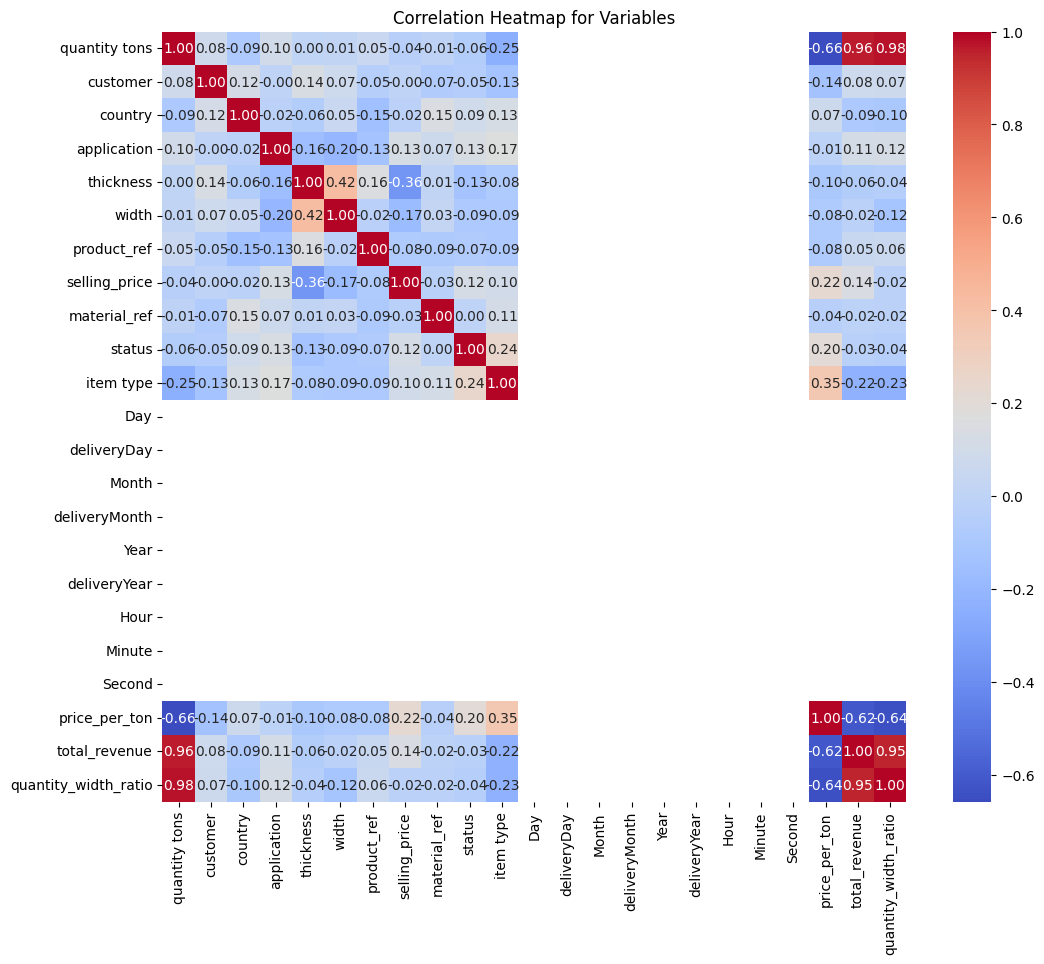

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Variables')
plt.show()

- **Low Correlation:** Time-related features ('Day', 'deliveryDay', etc.) show minimal correlation with the target variable 'selling_price.'
  
- **Feature Redundancy:** These time-related features exhibit high correlation among themselves, indicating potential redundancy.

- **Model Simplicity:** Excluding irrelevant features enhances model simplicity, interpretability, and guards against overfitting

-  **Minimal PredictivePower:** With weak associations, the inclusion of time-related features does not significantly contribute to predicting  'selling_price.'

- **Decision:** The decision to exclude these features aims to streamline the model for improved clarity and generalization.

# drop the time related feature 

In [42]:
df2=df1.drop(['Day','deliveryDay','Month','deliveryMonth','Year','deliveryYear','Hour','Minute','Second'],axis=1)

In [43]:
df2

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,material_ref,status,item type,price_per_ton,total_revenue,quantity_width_ratio
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,854.00,10285.0,7.0,5.0,15.770675,46245.072381,0.036101
1,151.455482,30202938.0,25.0,41.0,0.80,1210.0,1668701718,1047.00,6200.0,7.0,5.0,1.363237,127212.783935,0.121786
2,151.455482,30153963.0,30.0,28.0,0.38,952.0,628377,644.33,12576.0,7.0,6.0,1.668696,127212.783935,0.121786
3,151.455482,30349574.0,32.0,59.0,2.30,1317.0,1668701718,768.00,10559.0,7.0,3.0,3.794259,127212.783935,0.121786
4,151.455482,30211560.0,28.0,10.0,4.00,1980.0,640665,577.00,6200.0,7.0,5.0,0.734539,127212.783935,0.121786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,41.0,0.96,1220.0,164141591,591.00,6200.0,7.0,5.0,5.766843,60567.111166,0.084002
181669,151.455482,30200854.0,25.0,41.0,0.95,1500.0,164141591,589.00,6200.0,7.0,5.0,2.830554,122562.930005,0.121786
181670,4.235594,30200854.0,25.0,41.0,0.71,1250.0,164141591,619.00,6200.0,7.0,5.0,146.142445,2621.832419,0.003388
181671,4.235592,30200854.0,25.0,41.0,0.85,1250.0,164141591,601.00,6200.0,7.0,5.0,141.892786,2545.591013,0.003388


In [44]:
df2.isnull().sum()

quantity tons           0
customer                0
country                 0
application             0
thickness               0
width                   0
product_ref             0
selling_price           0
material_ref            0
status                  0
item type               0
price_per_ton           0
total_revenue           0
quantity_width_ratio    0
dtype: int64

**Descriptive,describe about the data**

In [45]:
df2.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,material_ref,status,item type,price_per_ton,total_revenue,quantity_width_ratio
count,181636.000000,1.816360e+05,181636.000000,181636.000000,181636.000000,181636.000000,1.816360e+05,181636.000000,181636.000000,181636.000000,181636.000000,181636.000000,181636.000000,181636.000000
mean,49.176745,3.023266e+07,44.893270,25.606945,2.244989,1297.025376,4.740377e+08,819.114844,9356.554521,5.132545,4.133200,46.761383,40038.622060,0.039127
std,47.997570,7.128470e+04,24.404311,17.718819,1.890408,248.970043,7.175406e+08,209.088433,1987.122421,2.644410,1.055222,49.657526,40246.610921,0.038648
min,-4.000000,3.007159e+07,25.000000,2.000000,0.180000,700.000000,6.117280e+05,243.000000,6200.000000,0.000000,0.000000,-75.400607,-61894.552052,-0.002667
25%,10.968547,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,669.000000,8591.000000,2.000000,3.000000,10.751936,9020.698943,0.009051
50%,30.364016,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,812.000000,9443.000000,7.000000,5.000000,25.173676,24386.747676,0.023782
75%,67.163321,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,953.000000,10185.000000,7.000000,5.000000,68.186965,56297.532940,0.054145
max,151.455482,3.040571e+07,113.000000,87.500000,6.450000,1980.000000,1.722208e+09,1379.000000,12576.000000,8.000000,6.000000,154.339508,127212.783935,0.121786


# Univariate Analysis

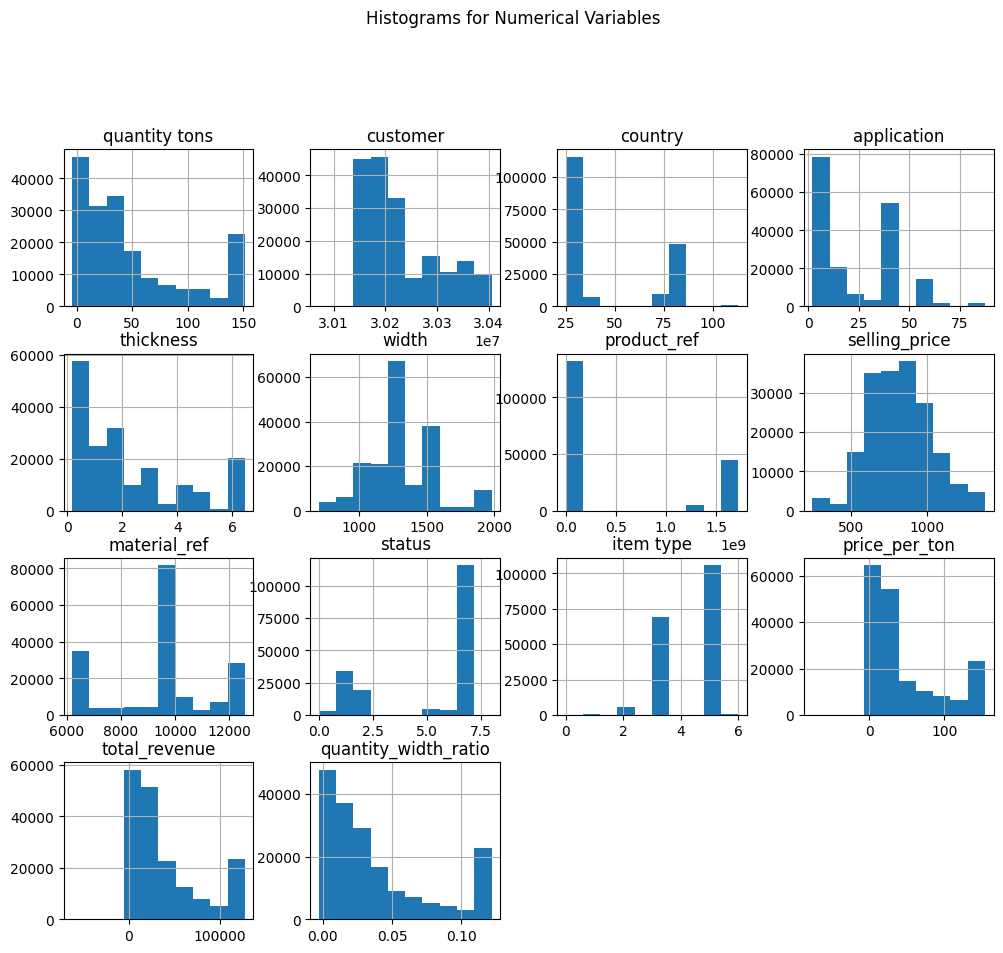

In [46]:
# Plot histograms for each numerical variable
df2.hist(figsize=(12, 10))
plt.suptitle("Histograms for Numerical Variables", y=1.02)
plt.show()

Histograms visualize the distribution of each numerical variable by grouping data into bins and displaying the frequency of observations in each bin.
Insights:
Look for the shape of the distribution (bell-shaped, skewed, etc.).
Identify the center and spread of the data.
Check for any noticeable patterns or clusters.

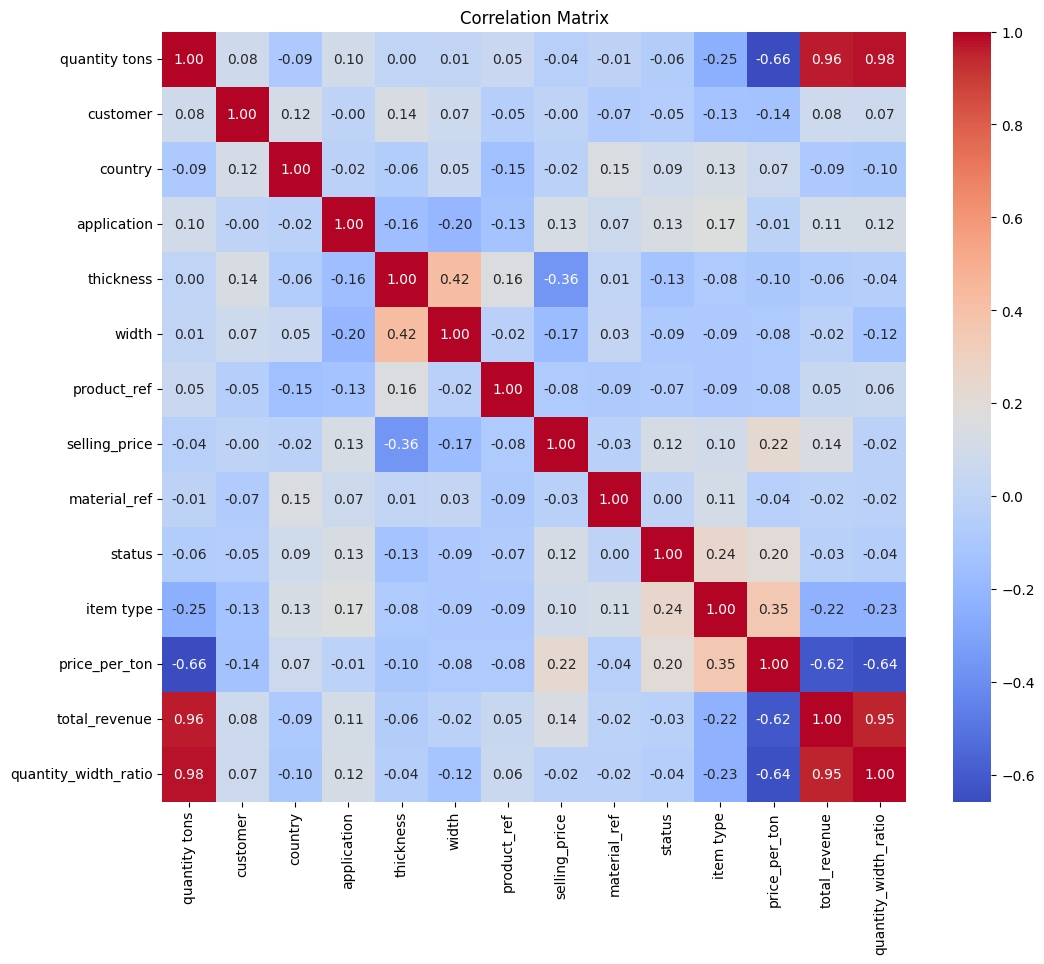

In [47]:
# Check for correlation between numerical variables
plt.figure(figsize=(12, 10))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- A **positive correlation** close to 1 indicates a strong positive relationship between two variables.
**Example: If there's a strong positive correlation between 'quantity tons' and 'selling_price,' it suggests that as the quantity increases, the selling price tends to increase.**
Negative Correlations:

- A **negative correlation** close to -1 indicates a strong negative relationship between two variables.
**Example: If there's a strong negative correlation between 'thickness' and 'width,' it suggests that as thickness increases, width tends to decrease.**

# Bivariate Analysis

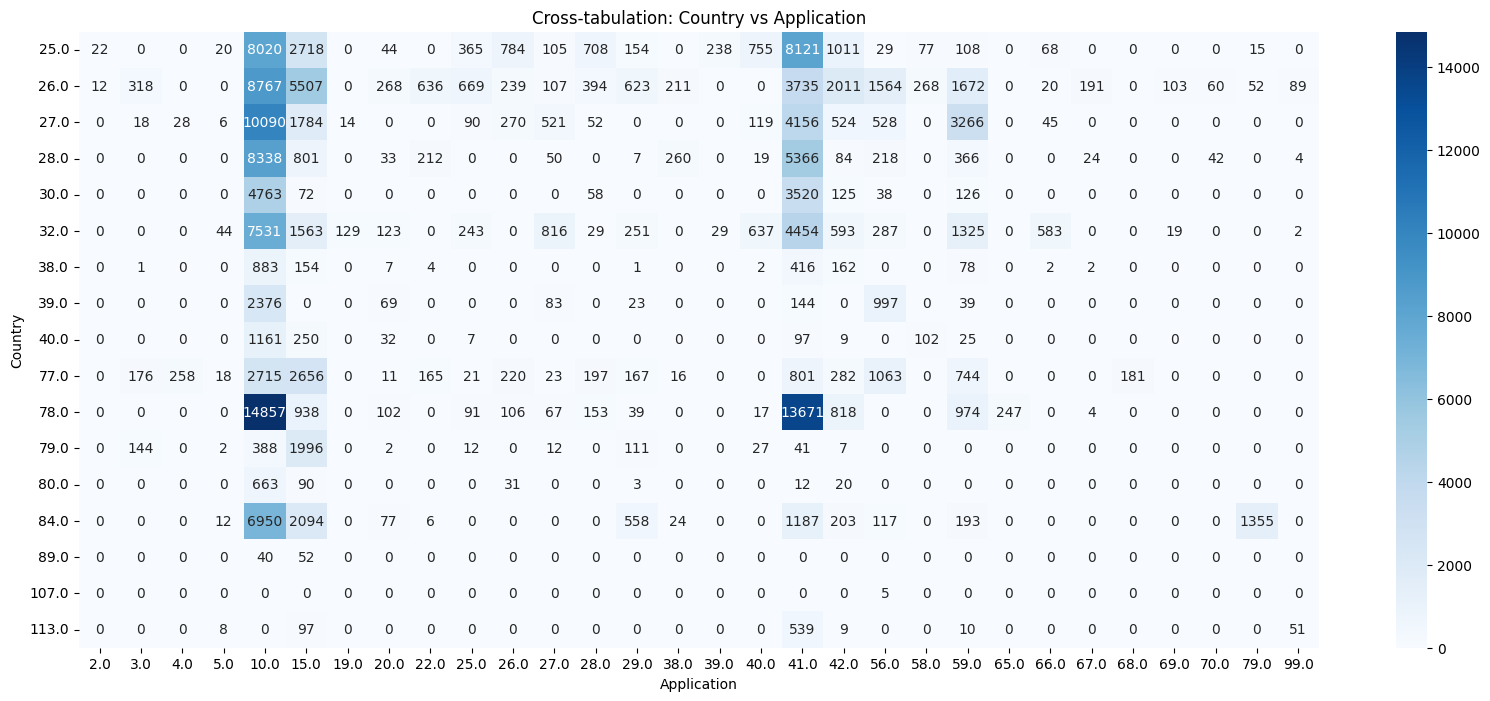

In [48]:
# Cross-tabulation for categorical variables
cross_tab = pd.crosstab(df['country'], df['application'])
plt.figure(figsize=(20,8))
sns.heatmap(cross_tab, annot=True, cmap="Blues", cbar=True, fmt="d")
plt.title("Cross-tabulation: Country vs Application")
plt.xlabel("Application")
plt.ylabel("Country")
plt.show()

- **Heatmap Color Intensity** Darker colors signify higher occurrences, providing a visual representation of associations between countries and applications.
  
- **Axis Labels** The X-axis shows different application types, and the Y-axis represents various countries, facilitating a clear identification of patterns.

- **Annotations** Numbers in each cell indicate the frequency of occurrences for a specific country-application pair, aiding in precise interpretation.

- **Decision-Making Impact** Example Scenario: "Understanding these patterns can be crucial for decision-making. If your business strategy involves targeting specific applications in different countries, this analysis helps identify potential focus areas or areas needing more attention."


- **Limitations** While insightful, the heatmap's correlations don't imply causation; further analysis and context are crucial for a comprehensive understanding of observed patterns.

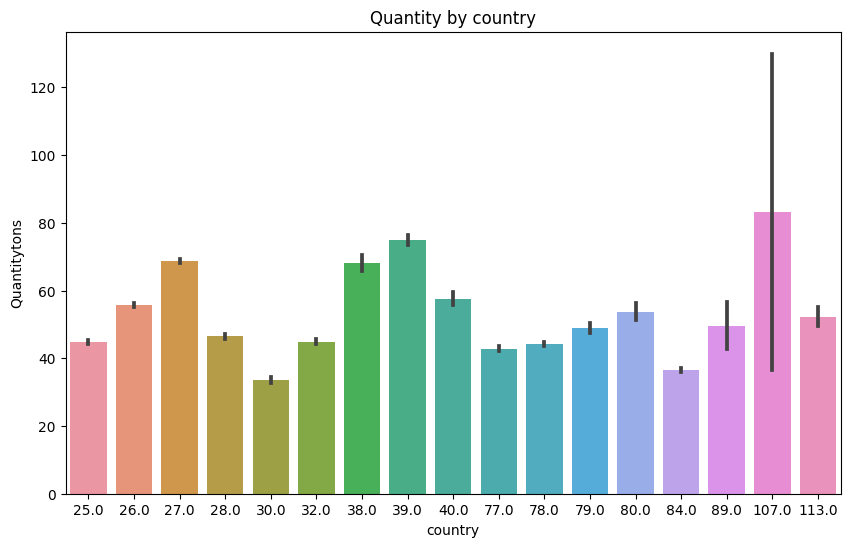

In [49]:
# Bar chart - Quantity by Application
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='quantity tons', data=df2)
plt.title('Quantity by country')
plt.xlabel('country')
plt.ylabel('Quantitytons')
plt.show()

- This chart shows the quantity of products for each application.
- It helps to identify which country has the highest or lowest quantity.
  
- In terms of quantity, the country with the highest selling tons is 107.0. This suggests that the customer in this country is a significant contributor to the copper modeling business. Their substantial purchasing volume indicates their importance as a valuable customer in this industry.

# Data Split for Regression 

In [50]:
Rdata=df2.copy()
X=Rdata.drop('selling_price',axis=1).copy()
Y=Rdata['selling_price'].copy()

# Data Split for Classification 

In [51]:
Cdata=df2.copy()
x=Cdata.drop('status',axis=1).copy()
y=Cdata['status'].copy()

In [52]:
X

,quantity tons,customer,country,application,thickness,width,product_ref,material_ref,status,item type,price_per_ton,total_revenue,quantity_width_ratio
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,10285.0,7.0,5.0,15.770675,46245.072381,0.036101
1,151.455482,30202938.0,25.0,41.0,0.80,1210.0,1668701718,6200.0,7.0,5.0,1.363237,127212.783935,0.121786
2,151.455482,30153963.0,30.0,28.0,0.38,952.0,628377,12576.0,7.0,6.0,1.668696,127212.783935,0.121786
3,151.455482,30349574.0,32.0,59.0,2.30,1317.0,1668701718,10559.0,7.0,3.0,3.794259,127212.783935,0.121786
4,151.455482,30211560.0,28.0,10.0,4.00,1980.0,640665,6200.0,7.0,5.0,0.734539,127212.783935,0.121786
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,41.0,0.96,1220.0,164141591,6200.0,7.0,5.0,5.766843,60567.111166,0.084002
181669,151.455482,30200854.0,25.0,41.0,0.95,1500.0,164141591,6200.0,7.0,5.0,2.830554,122562.930005,0.121786
181670,4.235594,30200854.0,25.0,41.0,0.71,1250.0,164141591,6200.0,7.0,5.0,146.142445,2621.832419,0.003388
181671,4.235592,30200854.0,25.0,41.0,0.85,1250.0,164141591,6200.0,7.0,5.0,141.892786,2545.591013,0.003388


In [53]:
# Train&Test data split Regression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,shuffle=True)

In [54]:
# Train&Test data split Classification
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [55]:
y

0         7.0
1         7.0
2         7.0
3         7.0
4         7.0
         ... 
181668    7.0
181669    7.0
181670    7.0
181671    7.0
181672    7.0
Name: status, Length: 181636, dtype: float64

# Feature selection Regression 

In [56]:
# Assuming X_train and y_train are your feature matrix and target variable
best_features = SelectKBest(score_func=f_regression, k=10)
fit = best_features.fit(X_train, Y_train)

# Get feature scores and indices
feature_scores =fit.scores_
feature_indices = fit.get_support(indices=True)

# Create a DataFrame with feature names and scores
df2columns = pd.DataFrame(X_train.columns)
df2scores = pd.DataFrame(feature_scores)
featurescores = pd.concat([df2columns, df2scores], axis=1)
featurescores.columns = ['Specs', 'Score']
# Display feature score
print(featurescores)

                   Specs         Score
0          quantity tons    233.269141
1               customer      3.331806
2                country     61.443221
3            application   2131.580523
4              thickness  19340.447197
5                  width   3856.648139
6            product_ref    787.637854
7           material_ref    139.893011
8                 status   1887.848252
9              item type   1181.879691
10         price_per_ton   6660.331059
11         total_revenue   2495.385068
12  quantity_width_ratio     58.384635


In [57]:
featurescores.isnull().sum() 

Specs    0
Score    0
dtype: int64

In [58]:
feature_list=featurescores['Specs'].to_list()
feature_list

['quantity tons',
 'customer',
 'country',
 'application',
 'thickness',
 'width',
 'product_ref',
 'material_ref',
 'status',
 'item type',
 'price_per_ton',
 'total_revenue',
 'quantity_width_ratio']

In [59]:
import joblib as jb
jb.dump(feature_list,'D:/DS NOTE/My external project/IndustrialCopperModeling/featureselected_model.pkl')

['D:/DS NOTE/My external project/IndustrialCopperModeling/featureselected_model.pkl']

In [60]:
feature_selected=X_train[feature_list]
feature_selected

,quantity tons,customer,country,application,thickness,width,product_ref,material_ref,status,item type,price_per_ton,total_revenue,quantity_width_ratio
68220,37.111607,30346485.0,28.0,41.0,0.60,1250.0,611993,6200.0,7.0,5.0,27.215205,37482.722989,0.029689
153242,82.330649,30157111.0,78.0,41.0,0.50,1246.0,611993,12576.0,7.0,5.0,10.008424,67840.454504,0.066076
98480,28.993221,30201846.0,25.0,10.0,1.50,1250.0,1670798778,7510.0,7.0,3.0,22.419034,18845.593410,0.023195
80251,3.634396,30165529.0,78.0,10.0,6.45,1000.0,640665,9443.0,7.0,5.0,154.339508,2515.002326,0.003634
89997,16.200311,30230331.0,80.0,10.0,5.00,1980.0,640665,12576.0,7.0,5.0,38.394324,10076.593573,0.008100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119914,36.930061,30329606.0,77.0,15.0,5.00,1500.0,640405,12576.0,1.0,5.0,15.380424,20976.274620,0.024620
103695,14.171233,30211350.0,30.0,10.0,0.70,1220.0,611993,8320.0,7.0,5.0,77.200059,15503.611911,0.011616
131969,41.237065,30153510.0,30.0,41.0,1.75,1014.0,164141591,12576.0,7.0,5.0,15.709169,26713.370415,0.040668
146904,111.947134,30162405.0,84.0,79.0,3.00,1250.0,164141591,6445.0,1.0,5.0,6.011766,75340.420846,0.089558


In [61]:
Feature_selection =jb.load('D:/DS NOTE/My external project/IndustrialCopperModeling/featureselected_model.pkl')

In [62]:
feature_selected_test=X_test[Feature_selection]
feature_selected_test

,quantity tons,customer,country,application,thickness,width,product_ref,material_ref,status,item type,price_per_ton,total_revenue,quantity_width_ratio
37893,151.455482,30199280.0,26.0,42.0,0.40,1004.0,611993,6200.0,7.0,5.0,1.529435,127212.783935,0.121786
107624,27.813086,30198761.0,26.0,10.0,2.00,1460.0,611993,9443.0,2.0,3.0,31.280240,24197.384498,0.019050
65395,9.478873,30198074.0,26.0,15.0,0.87,1500.0,164337175,6200.0,1.0,3.0,111.300154,10000.210752,0.006319
140622,17.342734,30201846.0,25.0,10.0,0.60,1250.0,628377,6914.0,7.0,3.0,34.423639,10353.612049,0.013874
30330,55.233298,30346297.0,78.0,41.0,0.50,1250.0,611993,11835.0,7.0,5.0,25.256504,77050.450668,0.044187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,104.410002,30205825.0,25.0,10.0,2.00,1250.0,1332077137,9443.0,7.0,5.0,9.682980,105558.511618,0.083528
33991,48.986654,30393641.0,39.0,10.0,6.00,1500.0,1670798778,9443.0,7.0,5.0,18.290696,43892.042342,0.032658
93618,6.344509,30156308.0,28.0,10.0,4.00,1980.0,640665,12576.0,7.0,5.0,101.189857,4073.175062,0.003156
50056,0.794198,30197016.0,39.0,20.0,0.67,1410.0,628377,9443.0,5.0,5.0,154.339508,753.694325,0.000563


# Model Traning Regression

# RandomForestRegressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=14)
rf.fit(feature_selected, Y_train)
print('Train score',rf.score(feature_selected, Y_train)*100)
print('Test score',rf.score(feature_selected_test, Y_test)*100)

Train score 95.065075840363
Test score 94.52689924092336


# DecisionTreeRegressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=14)
DT_model.fit(feature_selected, Y_train)
print('Train score',DT_model.score(feature_selected, Y_train)*100)
print('Test score',DT_model.score(feature_selected_test, Y_test)*100)

Train score 94.05220482869471
Test score 93.07034964352337


# KNeighborsRegressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor
Knn_model = KNeighborsRegressor(n_neighbors=6)  
Knn_model.fit(feature_selected, Y_train)
print('Train score',Knn_model.score(feature_selected, Y_train)*100)
print('Test score',Knn_model.score(feature_selected_test, Y_test)*100)

Train score 70.64238121741916
Test score 58.47652499240941


In [66]:
import joblib as jb
jb.dump(rf,'D:/DS NOTE/My external project/IndustrialCopperModeling/test/rf_model.pkl')
jb.dump(DT_model,'D:/DS NOTE/My external project/IndustrialCopperModeling/test/DT_model.pkl')
jb.dump(Knn_model,'D:/DS NOTE/My external project/IndustrialCopperModeling/test/Knn_model.pkl')

['D:/DS NOTE/My external project/IndustrialCopperModeling/test/Knn_model.pkl']

# Prediction & Evaluation Metrics

In [67]:
Modelrf=jb.load('D:/DS NOTE/My external project/IndustrialCopperModeling/test/rf_model.pkl')
ModelDT=jb.load('D:/DS NOTE/My external project/IndustrialCopperModeling/test/rf_model.pkl')
ModelKnn=jb.load('D:/DS NOTE/My external project/IndustrialCopperModeling/test/rf_model.pkl')

In [68]:
models = [Modelrf, ModelDT, Knn_model]
model_names = ['Random Forest', 'Decision Tree', 'K-Nearest Neighbors']

for model, model_name in zip(models, model_names):
    y_pred = pd.DataFrame(model.predict(feature_selected_test))
    result = pd.DataFrame({'Actual': Y_test, f'Predicted_{model_name.replace(" ", "_")}': y_pred.values.flatten()})
    
    print(f"\nRESULTS---ACTUAL VS PREDICTED for {model_name}:")
    print(result)

    # Calculate R-squared (R2_score)
    model_r2 = r2_score(Y_test, y_pred)
    print(f'\n{model_name} R2 Score: {model_r2}')



RESULTS---ACTUAL VS PREDICTED for Random Forest:
        Actual  Predicted_Random_Forest
37893   1240.0              1050.068128
107624   870.0               862.893029
65395   1055.0              1035.114741
140622   597.0               605.268266
30330   1379.0              1369.120127
...        ...                      ...
4450    1011.0              1020.248059
33991    896.0               886.814441
93618    642.0               646.837731
50056    949.0               717.876017
89982    857.0               859.810684

[54491 rows x 2 columns]

Random Forest R2 Score: 0.9452689924092336

RESULTS---ACTUAL VS PREDICTED for Decision Tree:
        Actual  Predicted_Decision_Tree
37893   1240.0              1050.068128
107624   870.0               862.893029
65395   1055.0              1035.114741
140622   597.0               605.268266
30330   1379.0              1369.120127
...        ...                      ...
4450    1011.0              1020.248059
33991    896.0               8

# Finding The Best Model in Regression

In [69]:
r2={'R2_score':['KNN', 'DT', 'RF'],
        'score':[58, 93, 94]}
R2_df=pd.DataFrame(r2)
R2_df

,R2_score,score
0,KNN,58
1,DT,93
2,RF,94


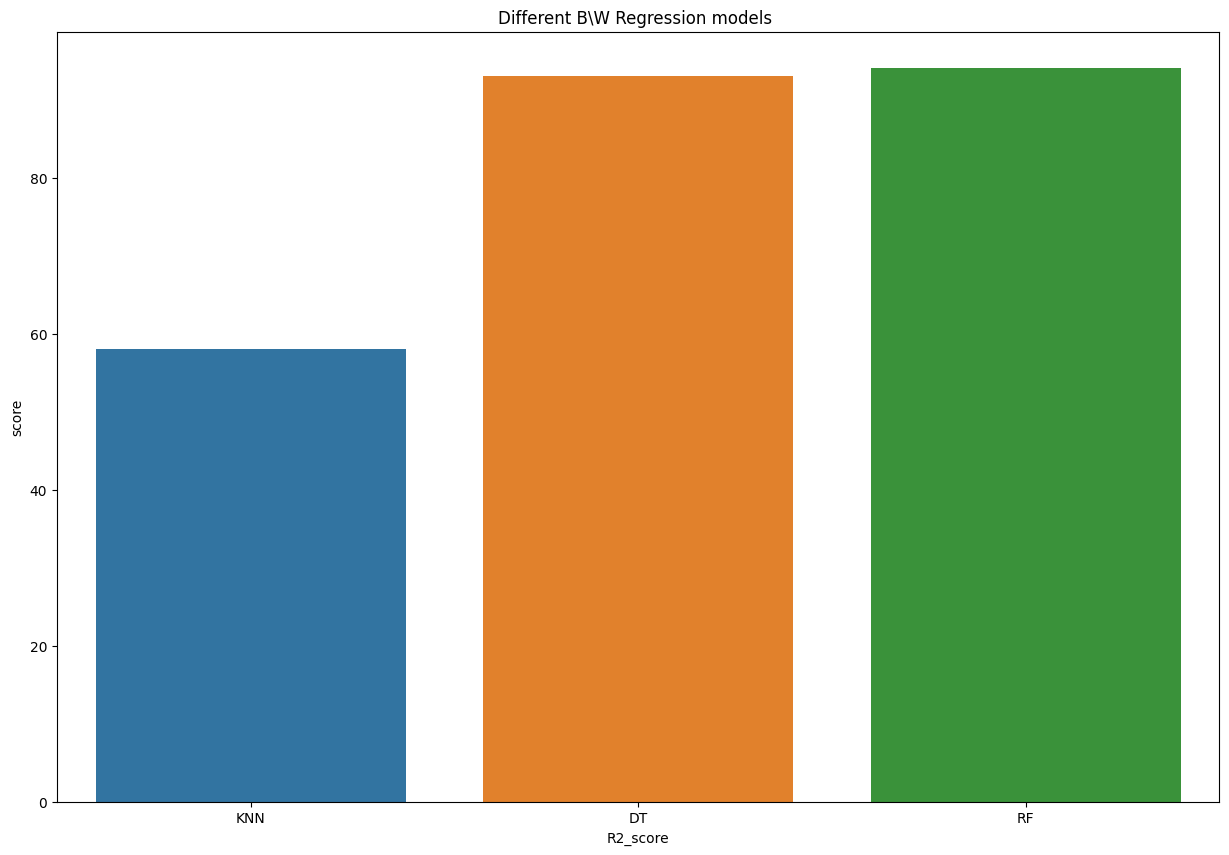

In [70]:
plt.figure(figsize=(15,10))
sns.barplot(x=R2_df.R2_score,y=R2_df.score)
plt.title("Different B\W Regression models ")
plt.show()


# Feature selection for Classification 

In [71]:
# Assuming X_cls_train and Y_cls_train are your feature matrix and target variable for classification
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x_train, y_train)

# Get feature scores and indices
feature_scores =fit.scores_
feature_indices = fit.get_support(indices=True)

# Create a DataFrame with feature names and scores
df2columns = pd.DataFrame(x_train.columns)
df2scores = pd.DataFrame(feature_scores)
featurescores = pd.concat([df2columns, df2scores], axis=1)
featurescores.columns = ['Specs', 'Score']
# Display feature score
print(featurescores)

                   Specs        Score
0          quantity tons   133.780601
1               customer   105.791839
2                country   179.667223
3            application   601.707065
4              thickness   525.302310
5                  width   232.984406
6            product_ref   172.029527
7          selling_price  2586.401264
8           material_ref    44.894695
9              item type  1094.906885
10         price_per_ton   821.844559
11         total_revenue   377.854040
12  quantity_width_ratio   109.679848


In [72]:
featurescores.isnull().sum() 

Specs    0
Score    0
dtype: int64

In [73]:
Clf_feature_list=featurescores['Specs'].to_list()
Clf_feature_list

['quantity tons',
 'customer',
 'country',
 'application',
 'thickness',
 'width',
 'product_ref',
 'selling_price',
 'material_ref',
 'item type',
 'price_per_ton',
 'total_revenue',
 'quantity_width_ratio']

In [74]:
import joblib as jb
jb.dump(Clf_feature_list,'D:/DS NOTE/My external project/IndustrialCopperModeling/Clf_featureselected_model.pkl')

['D:/DS NOTE/My external project/IndustrialCopperModeling/Clf_featureselected_model.pkl']

In [75]:
Clf_feature_selected=x_train[Clf_feature_list]
Clf_feature_selected

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,material_ref,item type,price_per_ton,total_revenue,quantity_width_ratio
68220,37.111607,30346485.0,28.0,41.0,0.60,1250.0,611993,1010.00,6200.0,5.0,27.215205,37482.722989,0.029689
153242,82.330649,30157111.0,78.0,41.0,0.50,1246.0,611993,824.00,12576.0,5.0,10.008424,67840.454504,0.066076
98480,28.993221,30201846.0,25.0,10.0,1.50,1250.0,1670798778,650.00,7510.0,3.0,22.419034,18845.593410,0.023195
80251,3.634396,30165529.0,78.0,10.0,6.45,1000.0,640665,692.00,9443.0,5.0,154.339508,2515.002326,0.003634
89997,16.200311,30230331.0,80.0,10.0,5.00,1980.0,640665,622.00,12576.0,5.0,38.394324,10076.593573,0.008100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119914,36.930061,30329606.0,77.0,15.0,5.00,1500.0,640405,568.00,12576.0,5.0,15.380424,20976.274620,0.024620
103695,14.171233,30211350.0,30.0,10.0,0.70,1220.0,611993,1094.02,8320.0,5.0,77.200059,15503.611911,0.011616
131969,41.237065,30153510.0,30.0,41.0,1.75,1014.0,164141591,647.80,12576.0,5.0,15.709169,26713.370415,0.040668
146904,111.947134,30162405.0,84.0,79.0,3.00,1250.0,164141591,673.00,6445.0,5.0,6.011766,75340.420846,0.089558


In [76]:
Clf_Feature_selection =jb.load('D:/DS NOTE/My external project/IndustrialCopperModeling/Clf_featureselected_model.pkl')


In [77]:
Clf_feature_selected_test=x_test[Clf_Feature_selection]
Clf_feature_selected_test

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,material_ref,item type,price_per_ton,total_revenue,quantity_width_ratio
37893,151.455482,30199280.0,26.0,42.0,0.40,1004.0,611993,1240.0,6200.0,5.0,1.529435,127212.783935,0.121786
107624,27.813086,30198761.0,26.0,10.0,2.00,1460.0,611993,870.0,9443.0,3.0,31.280240,24197.384498,0.019050
65395,9.478873,30198074.0,26.0,15.0,0.87,1500.0,164337175,1055.0,6200.0,3.0,111.300154,10000.210752,0.006319
140622,17.342734,30201846.0,25.0,10.0,0.60,1250.0,628377,597.0,6914.0,3.0,34.423639,10353.612049,0.013874
30330,55.233298,30346297.0,78.0,41.0,0.50,1250.0,611993,1379.0,11835.0,5.0,25.256504,77050.450668,0.044187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,104.410002,30205825.0,25.0,10.0,2.00,1250.0,1332077137,1011.0,9443.0,5.0,9.682980,105558.511618,0.083528
33991,48.986654,30393641.0,39.0,10.0,6.00,1500.0,1670798778,896.0,9443.0,5.0,18.290696,43892.042342,0.032658
93618,6.344509,30156308.0,28.0,10.0,4.00,1980.0,640665,642.0,12576.0,5.0,101.189857,4073.175062,0.003156
50056,0.794198,30197016.0,39.0,20.0,0.67,1410.0,628377,949.0,9443.0,5.0,154.339508,753.694325,0.000563


# Model train Classification 

# RandomForestClassifier

In [78]:
rf_model_clf = RandomForestClassifier(n_estimators=100, max_depth=20)
rf_model_clf.fit(Clf_feature_selected, y_train)
print('Train score',rf_model_clf.score(Clf_feature_selected, y_train)*100)
print('Test score',rf_model_clf.score(Clf_feature_selected_test, y_test)*100)

Train score 96.5456761964686
Test score 85.39942375805178


# K-Nearest Neighbors (KNN)

In [79]:
Knn_clf= KNeighborsClassifier( n_neighbors=15,)
Knn_clf.fit(Clf_feature_selected, y_train)
print('Train score',Knn_clf.score(Clf_feature_selected, y_train)*100)
print('Test score',Knn_clf.score(Clf_feature_selected_test, y_test)*100)

Train score 76.18939006645955
Test score 72.78082619148117


# DecisionTreeClassifier

In [80]:
Dt_clf= DecisionTreeClassifier(max_depth=20)
Dt_clf.fit(Clf_feature_selected, y_train)
print('Train score',Dt_clf.score(Clf_feature_selected, y_train)*100)
print('Test score',Dt_clf.score(Clf_feature_selected_test, y_test)*100)

Train score 94.34267961775925
Test score 83.00636802407737


In [81]:
import joblib as jb
jb.dump(rf_model_clf,'D:/DS NOTE/My external project/IndustrialCopperModeling/test/rf_model_clf.pkl')
jb.dump(Knn_clf,'D:/DS NOTE/My external project/IndustrialCopperModeling/test/Knn_clf_model.pkl')
jb.dump(Dt_clf,'D:/DS NOTE/My external project/IndustrialCopperModeling/test/Dt_clf_model.pkl')

['D:/DS NOTE/My external project/IndustrialCopperModeling/test/Dt_clf_model.pkl']

# Prediction & Evaluation Metrics

In [82]:
rf_model=jb.load('D:/DS NOTE/My external project/IndustrialCopperModeling/test/rf_model_clf.pkl')
Knn_model=jb.load('D:/DS NOTE/My external project/IndustrialCopperModeling/test/Knn_clf_model.pkl')
Dt_model=jb.load('D:/DS NOTE/My external project/IndustrialCopperModeling/test/Dt_clf_model.pkl')


RESULTS --- ACTUAL VS PREDICTED for Random Forest:
        Actual  Predicted_Random_Forest
37893      7.0                      7.0
107624     2.0                      1.0
65395      1.0                      1.0
140622     7.0                      7.0
30330      7.0                      7.0
...        ...                      ...
4450       7.0                      7.0
33991      7.0                      7.0
93618      7.0                      7.0
50056      5.0                      7.0
89982      7.0                      7.0

[54491 rows x 2 columns]

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       966
         1.0       0.80      0.77      0.78     10263
         2.0       0.77      0.62      0.68      5834
         3.0       0.67      1.00      0.80         2
         4.0       1.00      0.11      0.19        19
         5.0       0.69      0.29      0.41      1329
         6.0       0.

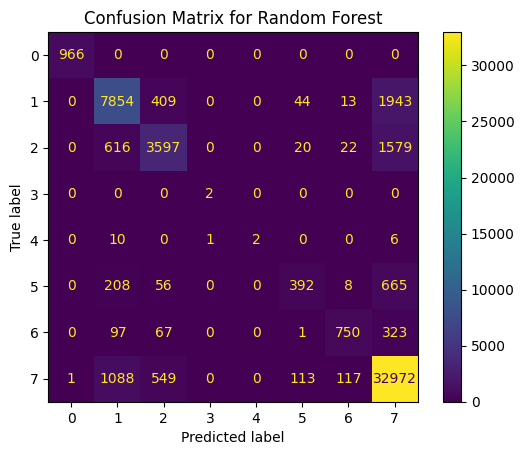


RESULTS --- ACTUAL VS PREDICTED for Decision Tree:
        Actual  Predicted_Decision_Tree
37893      7.0                      7.0
107624     2.0                      1.0
65395      1.0                      2.0
140622     7.0                      7.0
30330      7.0                      7.0
...        ...                      ...
4450       7.0                      7.0
33991      7.0                      7.0
93618      7.0                      7.0
50056      5.0                      7.0
89982      7.0                      1.0

[54491 rows x 2 columns]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       966
         1.0       0.76      0.74      0.75     10263
         2.0       0.67      0.66      0.66      5834
         3.0       0.33      0.50      0.40         2
         4.0       0.44      0.42      0.43        19
         5.0       0.46      0.40      0.43      1329
         6.0       0.

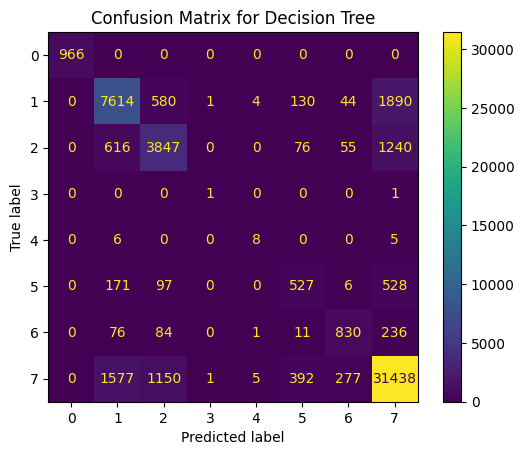


RESULTS --- ACTUAL VS PREDICTED for K-Nearest Neighbors:
        Actual  Predicted_K-Nearest_Neighbors
37893      7.0                            7.0
107624     2.0                            7.0
65395      1.0                            2.0
140622     7.0                            7.0
30330      7.0                            7.0
...        ...                            ...
4450       7.0                            7.0
33991      7.0                            7.0
93618      7.0                            7.0
50056      5.0                            7.0
89982      7.0                            1.0

[54491 rows x 2 columns]

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.81       966
         1.0       0.59      0.54      0.56     10263
         2.0       0.52      0.38      0.43      5834
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00  

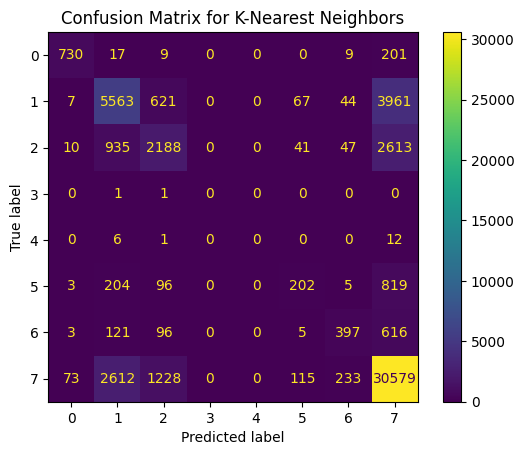

In [83]:
models = [rf_model, Dt_model, Knn_model]
model_names = ['Random Forest', 'Decision Tree', 'K-Nearest Neighbors']

for model, model_name in zip(models, model_names):
    y_pred = pd.DataFrame(model.predict(Clf_feature_selected_test))
    
    # Print results
    print(f"\nRESULTS --- ACTUAL VS PREDICTED for {model_name}:")
    result = pd.DataFrame({'Actual': y_test, f'Predicted_{model_name.replace(" ", "_")}': y_pred.values.flatten()})
    print(result)

    # Classification Report
    classification_rep = classification_report(y_test, y_pred)
    print(f'\nClassification Report for {model_name}:\n{classification_rep}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()  
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Finding The Best Model in Classification 

In [84]:
f1_score={'accuracy':['KNN', 'DT', 'RF'],
        'score':[73, 83, 85]}
f1_df=pd.DataFrame(r2)
f1_df

,R2_score,score
0,KNN,58
1,DT,93
2,RF,94


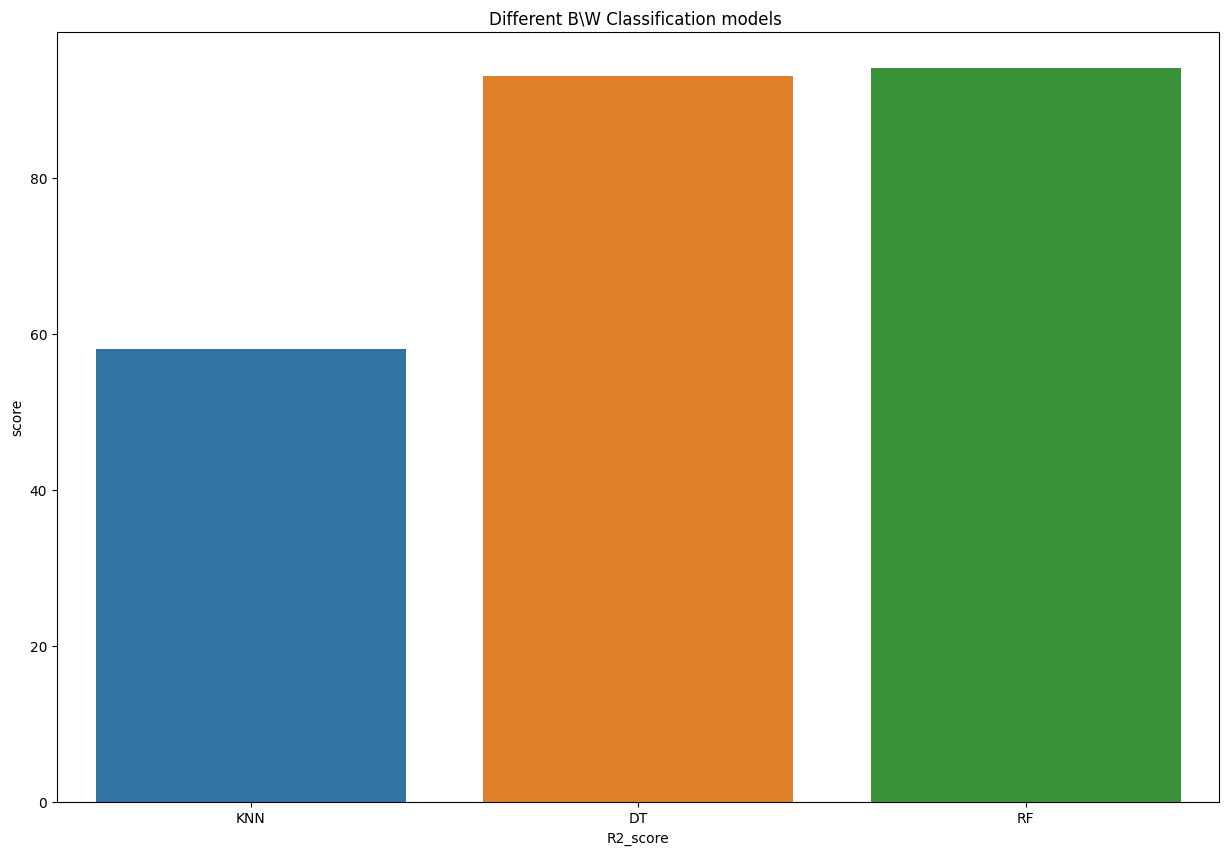

In [85]:
plt.figure(figsize=(15,10))
sns.barplot(x=f1_df.R2_score,y=f1_df.score)
plt.title("Different B\W Classification models ")
plt.show()

# Conclusion

The Industrial Copper Modeling project successfully addressed the challenges faced by the copper industry in handling less complex yet potentially skewed and noisy sales and pricing data. By implementing machine learning techniques, the project aimed to enhance accuracy in predictions, optimize pricing decisions, and improve lead classification for potential customer conversion.

### Regression Model - Random Forest

The Random Forest regression model achieved an impressive 94% prediction accuracy for the continuous variable 'Selling_Price'. This indicates a high level of reliability in predicting the selling prices of copper-related items. The R2 score of 0.95 further confirms the model's robustness in capturing the variance in the target variable.

### Classification Model - Random Forest

The Random Forest classification model demonstrated an 85% accuracy in predicting the lead status, distinguishing between 'Won' and 'Lost' outcomes. The precision, recall, and F1-score metrics provide insights into the model's performance across different classes. The high accuracy suggests that the model is effective in evaluating and classifying leads, aiding in decision-making regarding potential customer conversion.

### Business Impact

The project has the potential to significantly improve investors' decisions in the copper industry, leading to substantial profits. By leveraging advanced techniques such as data normalization, feature scaling, outlier detection, and robust algorithms, the models offer accurate predictions for pricing and lead classification. This enables stakeholders to make informed decisions, optimize pricing strategies, and prioritize leads more effectively.

In conclusion, the Industrial Copper Modeling project not only addresses the data challenges in the industry but also provides practical, data-driven solutions that can lead to better decision-making and financial gains in the manufacturing domain.